In [94]:
#Import Libraries
%matplotlib inline
import numpy as np
import pandas as pd
from time import time
import matplotlib.pyplot as plt
from IPython.display import Image
from matplotlib.pylab import rcParams
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn import kernel_approximation
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.kernel_approximation import (RBFSampler,Nystroem)
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier

rcParams['figure.figsize'] = 15, 5

In [95]:
data = pd.read_csv('/content/No-show-Issue-Comma-300k.csv')
data.head()

,Age,Gender,AppointmentRegistration,ApointmentData,DayOfTheWeek,Status,Diabetes,Alcoolism,HiperTension,Handcap,Smokes,Scholarship,Tuberculosis,Sms_Reminder,AwaitingTime
0,19,M,2014-12-16T14:46:25Z,2015-01-14T00:00:00Z,Wednesday,Show-Up,0,0,0,0,0,0,0,0,-29
1,24,F,2015-08-18T07:01:26Z,2015-08-19T00:00:00Z,Wednesday,Show-Up,0,0,0,0,0,0,0,0,-1
2,4,F,2014-02-17T12:53:46Z,2014-02-18T00:00:00Z,Tuesday,Show-Up,0,0,0,0,0,0,0,0,-1
3,5,M,2014-07-23T17:02:11Z,2014-08-07T00:00:00Z,Thursday,Show-Up,0,0,0,0,0,0,0,1,-15
4,38,M,2015-10-21T15:20:09Z,2015-10-27T00:00:00Z,Tuesday,Show-Up,0,0,0,0,0,0,0,1,-6


In [96]:
len(data)

300000

In [97]:
for column in list(data.columns):
  print("{0:25} {1}".format(column, data[column].nunique()))


Age                       109
Gender                    2
AppointmentRegistration   295425
ApointmentData            534
DayOfTheWeek              7
Status                    2
Diabetes                  2
Alcoolism                 2
HiperTension              2
Handcap                   5
Smokes                    2
Scholarship               2
Tuberculosis              2
Sms_Reminder              3
AwaitingTime              213


In [98]:
#data.dtype.columns
data.info()
#type(data['Age'])
# type(data['Gender'])
# type(data['AppointmentRegistration'])
# type(data['ApointmentData'])
# type(data['DayOfTheWeek'])
# type(data['Status'])
# type(data['Diabetes'])
#type(data['Alcoolism'])
# type(data['HiperTension'])
# type(data['Handcap'])
# type(data['Smokes'])
# type(data['Scholarship'])
# type(data['Tuberculosis'])
# type(data['Sms_Reminder'])
# type(data['AwaitingTime'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   Age                      300000 non-null  int64 
 1   Gender                   300000 non-null  object
 2   AppointmentRegistration  300000 non-null  object
 3   ApointmentData           300000 non-null  object
 4   DayOfTheWeek             300000 non-null  object
 5   Status                   300000 non-null  object
 6   Diabetes                 300000 non-null  int64 
 7   Alcoolism                300000 non-null  int64 
 8   HiperTension             300000 non-null  int64 
 9   Handcap                  300000 non-null  int64 
 10  Smokes                   300000 non-null  int64 
 11  Scholarship              300000 non-null  int64 
 12  Tuberculosis             300000 non-null  int64 
 13  Sms_Reminder             300000 non-null  int64 
 14  AwaitingTime        

In [99]:
def features_plots(discrete_vars):
  plt.figure(figsize=(15,24.5))
  for i, cv in enumerate(['Age', 'AwaitingTime']):
    plt.subplot(7, 2, i+1)
    plt.hist(data[cv], bins=len(data[cv].unique()))
    plt.title(cv)
    plt.ylabel('Frequency')
  for i, dv in enumerate(discrete_vars):
    plt.subplot(7, 2, i+3)
    data[dv].value_counts().plot(kind='bar', title=dv)
    plt.ylabel('Frequency')

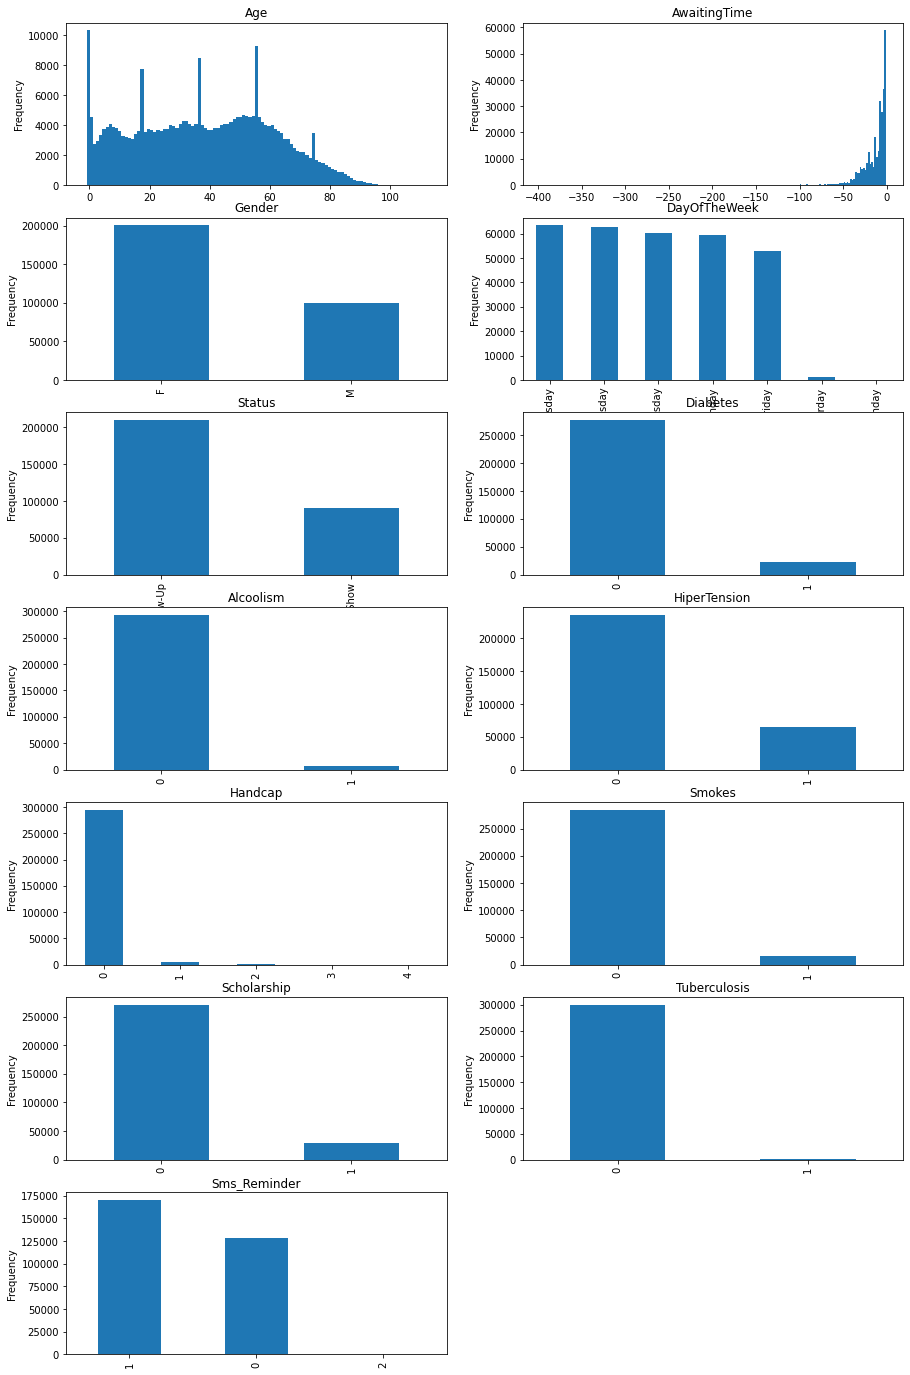

In [100]:
discrete_vars = ['Gender', 'DayOfTheWeek', 'Status', 'Diabetes',
'Alcoolism', 'HiperTension', 'Handcap', 'Smokes',
'Scholarship', 'Tuberculosis', 'Sms_Reminder']
features_plots(discrete_vars)

**-Observations**

> 
**Age**While observing from the age graph, range lay in the range of -2 and 113. whereas +ve values i.e 0 to 113 makes sense but -ve values in age doesn't make any sense. that's means there is some noise in data.


**> Handicap**: Instead of being boolean this is lay in the range of 0 to 4.

>**Sms_Reminder:**This feature has a range between 0 and 2. That means, Sms_reminder is actutually used to sent message reminders to the patient for their appointments.

**> Awaiting Time:**From graph, it is observed that time has negitive values that doesn't make any sense. As from the data, we know taht this feature shows the number of days, date and specific time at which appointment was issued. That's why positive values makes more sense.









In [101]:
#Data Wranggling (Data Cleaning)
data[data['Age'] < 0]['Age'].value_counts().sum()

6

In [102]:
data = data[data['Age'] >= 0]
del data['Handcap']

In [103]:
data['AwaitingTime'] = data['AwaitingTime'].apply(lambda x: abs(x))

In [104]:
#dow_mapping = {'Monday':0, 'Tuesday':1, 'Wednesday':2, 'Thursday':3,
# 'Friday':4, 'Saturday':5, 'Sunday':6}
# data['DayOfTheWeek'] = data['DayOfTheWeek'].map(dow_mapping)

In [105]:
# from sklearn.preprocessing import LabelEncoder
# # creating initial dataframe
# bridge_types = ('Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday')
# bridge_df = pd.DataFrame(bridge_types, columns=['DayOfTheWeek'])
# # creating instance of labelencoder
# labelencoder = LabelEncoder()
# # Assigning numerical values and storing in another column
# bridge_df['DayOfTheWeek'] = labelencoder.fit_transform(bridge_df['DayOfTheWeek'])
# bridge_df
# data.head()


In [106]:
def score_to_numeric(x):
  if x=='Sunday':
    return 6
  if x=='Saturday':
    return 5
  if x=='Friday':
      return 4
  if x=='Thursday':
    return 3
  if x=='Wednesday':
    return 2
  if x=='Tuesday':
    return 1
  if x=='Monday':
    return 0
data['DayOfTheWeek'] = data['DayOfTheWeek'].map(score_to_numeric)
data

,Age,Gender,AppointmentRegistration,ApointmentData,DayOfTheWeek,Status,Diabetes,Alcoolism,HiperTension,Smokes,Scholarship,Tuberculosis,Sms_Reminder,AwaitingTime
0,19,M,2014-12-16T14:46:25Z,2015-01-14T00:00:00Z,2,Show-Up,0,0,0,0,0,0,0,29
1,24,F,2015-08-18T07:01:26Z,2015-08-19T00:00:00Z,2,Show-Up,0,0,0,0,0,0,0,1
2,4,F,2014-02-17T12:53:46Z,2014-02-18T00:00:00Z,1,Show-Up,0,0,0,0,0,0,0,1
3,5,M,2014-07-23T17:02:11Z,2014-08-07T00:00:00Z,3,Show-Up,0,0,0,0,0,0,1,15
4,38,M,2015-10-21T15:20:09Z,2015-10-27T00:00:00Z,1,Show-Up,0,0,0,0,0,0,1,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299995,41,M,2014-03-24T09:28:22Z,2014-04-16T00:00:00Z,2,Show-Up,0,0,1,0,0,0,1,23
299996,67,F,2014-11-21T12:00:36Z,2014-11-25T00:00:00Z,1,Show-Up,1,0,1,0,0,0,1,4
299997,48,F,2014-07-24T15:46:38Z,2014-07-25T00:00:00Z,4,No-Show,0,0,0,0,1,0,0,1
299998,5,M,2015-05-15T09:58:50Z,2015-05-21T00:00:00Z,3,Show-Up,0,0,0,0,0,0,0,6


In [107]:
# def day_of_week(y):
#   if y=='Monday': return 0
#   if y=='Tuesday':   return 1
#   if y=='Wednesday':   return 2
#   if y=='Thursday':   return 3
#   if y=='Friday':   return 4
#   if y=='Saturday':   return 5
#   if y=='Sunday':   return 6

#     # Applying the function to the gender variable
# data['DayOfTheWeek_num'] = data['DayOfTheWeek'].apply(day_of_week)
# data


In [108]:
def gender_to_numeric(x):
  if x=='F': return 0
  if x=='M':   return 1

    # Applying the function to the gender variable
data['Gender'] = data['Gender'].apply(gender_to_numeric)
data


,Age,Gender,AppointmentRegistration,ApointmentData,DayOfTheWeek,Status,Diabetes,Alcoolism,HiperTension,Smokes,Scholarship,Tuberculosis,Sms_Reminder,AwaitingTime
0,19,1,2014-12-16T14:46:25Z,2015-01-14T00:00:00Z,2,Show-Up,0,0,0,0,0,0,0,29
1,24,0,2015-08-18T07:01:26Z,2015-08-19T00:00:00Z,2,Show-Up,0,0,0,0,0,0,0,1
2,4,0,2014-02-17T12:53:46Z,2014-02-18T00:00:00Z,1,Show-Up,0,0,0,0,0,0,0,1
3,5,1,2014-07-23T17:02:11Z,2014-08-07T00:00:00Z,3,Show-Up,0,0,0,0,0,0,1,15
4,38,1,2015-10-21T15:20:09Z,2015-10-27T00:00:00Z,1,Show-Up,0,0,0,0,0,0,1,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299995,41,1,2014-03-24T09:28:22Z,2014-04-16T00:00:00Z,2,Show-Up,0,0,1,0,0,0,1,23
299996,67,0,2014-11-21T12:00:36Z,2014-11-25T00:00:00Z,1,Show-Up,1,0,1,0,0,0,1,4
299997,48,0,2014-07-24T15:46:38Z,2014-07-25T00:00:00Z,4,No-Show,0,0,0,0,1,0,0,1
299998,5,1,2015-05-15T09:58:50Z,2015-05-21T00:00:00Z,3,Show-Up,0,0,0,0,0,0,0,6


In [109]:
def status_to_numeric(y):
  if y=='No-Show': return 0
  if y=='Show-Up':   return 1

    # Applying the function to the gender variable
data['Status'] = data['Status'].apply(status_to_numeric)
data

,Age,Gender,AppointmentRegistration,ApointmentData,DayOfTheWeek,Status,Diabetes,Alcoolism,HiperTension,Smokes,Scholarship,Tuberculosis,Sms_Reminder,AwaitingTime
0,19,1,2014-12-16T14:46:25Z,2015-01-14T00:00:00Z,2,1,0,0,0,0,0,0,0,29
1,24,0,2015-08-18T07:01:26Z,2015-08-19T00:00:00Z,2,1,0,0,0,0,0,0,0,1
2,4,0,2014-02-17T12:53:46Z,2014-02-18T00:00:00Z,1,1,0,0,0,0,0,0,0,1
3,5,1,2014-07-23T17:02:11Z,2014-08-07T00:00:00Z,3,1,0,0,0,0,0,0,1,15
4,38,1,2015-10-21T15:20:09Z,2015-10-27T00:00:00Z,1,1,0,0,0,0,0,0,1,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299995,41,1,2014-03-24T09:28:22Z,2014-04-16T00:00:00Z,2,1,0,0,1,0,0,0,1,23
299996,67,0,2014-11-21T12:00:36Z,2014-11-25T00:00:00Z,1,1,1,0,1,0,0,0,1,4
299997,48,0,2014-07-24T15:46:38Z,2014-07-25T00:00:00Z,4,0,0,0,0,0,1,0,0,1
299998,5,1,2015-05-15T09:58:50Z,2015-05-21T00:00:00Z,3,1,0,0,0,0,0,0,0,6


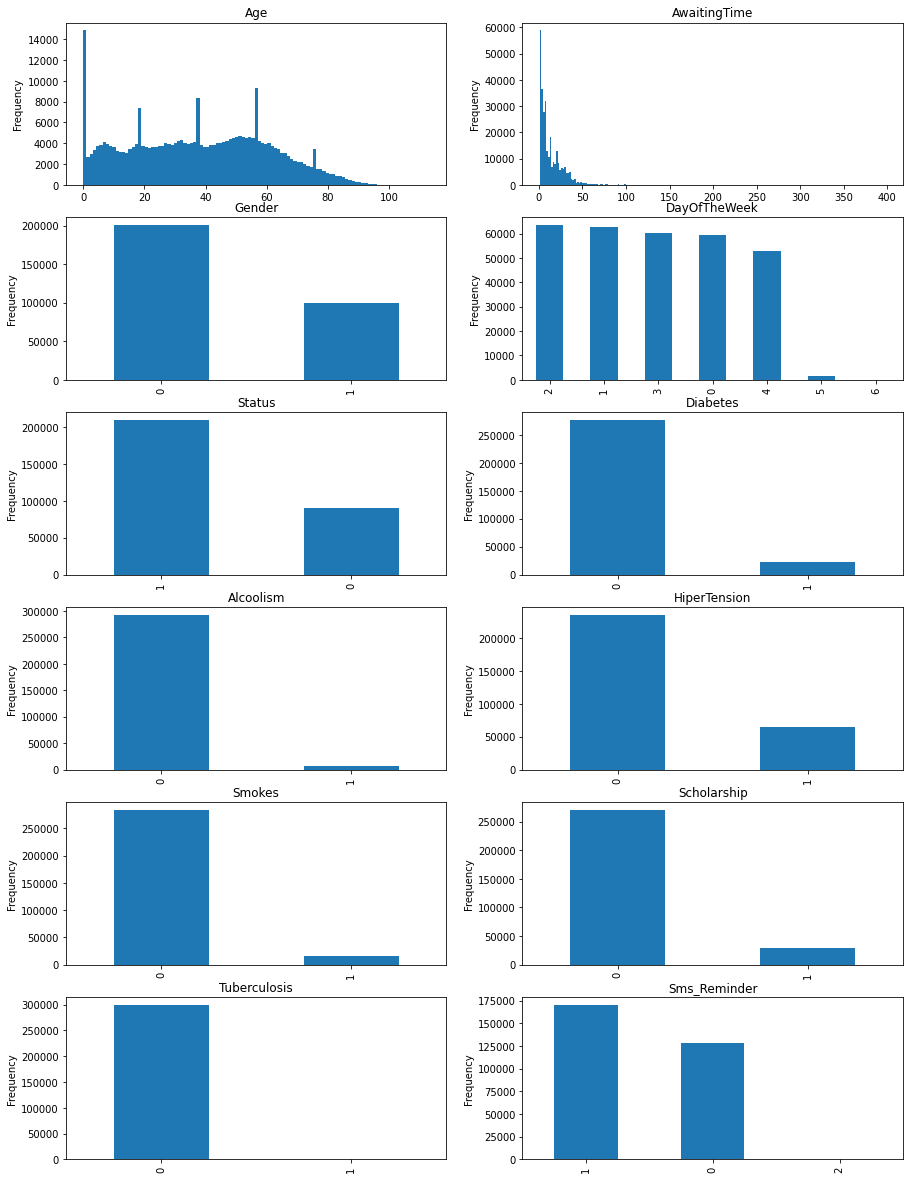

In [110]:
discrete_vars = ['Gender', 'DayOfTheWeek', 'Status', 'Diabetes',
'Alcoolism', 'HiperTension', 'Smokes',
'Scholarship', 'Tuberculosis', 'Sms_Reminder']
features_plots(discrete_vars)

# **Exploratory Data Analysis**

(0.0, 120.0)

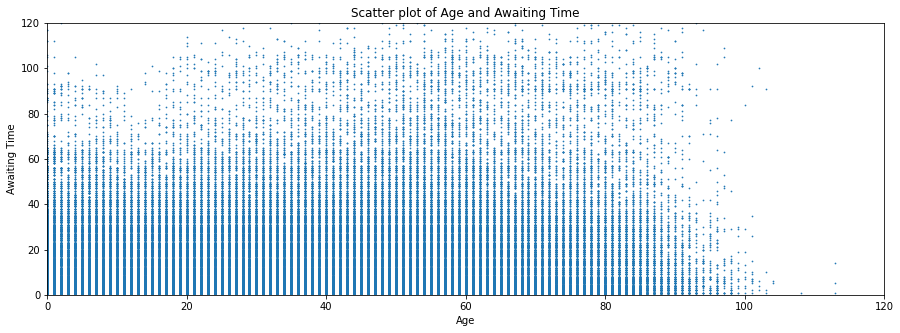

In [111]:
#Scatter Plot Between Age and AwaitingTime
plt.scatter(data['Age'], data['AwaitingTime'], s=0.5)
plt.title('Scatter plot of Age and Awaiting Time')
plt.xlabel('Age')
plt.ylabel('Awaiting Time')
plt.xlim(0, 120)
plt.ylim(0, 120)

In [112]:
#Pearson Correlation b/w Age & AwaitingTime
#pd.set_option('display.width', 100)
#pd.set_option('precision', 3)
#correlations = data[['Age', 'AwaitingTime']].corr(method='pearson')
correlations = data[['Age', 'AwaitingTime']].corr()
print(correlations)

                   Age  AwaitingTime
Age           1.000000     -0.004176
AwaitingTime -0.004176      1.000000


Text(0, 0.5, 'Frequency')

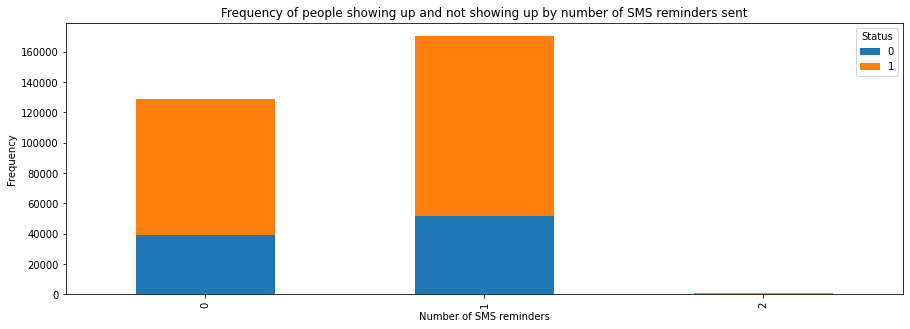

In [113]:
#Effect on Status on the Basis of Number of SMS Reminders
data_dow_status = data.groupby(['Sms_Reminder', 'Status'])['Sms_Reminder'].count().unstack('Status').fillna(0) 
data_dow_status[[0, 1]].plot(kind='bar', stacked=True)
plt.title('Frequency of people showing up and not showing up by number of SMS reminders sent')
plt.xlabel('Number of SMS reminders')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

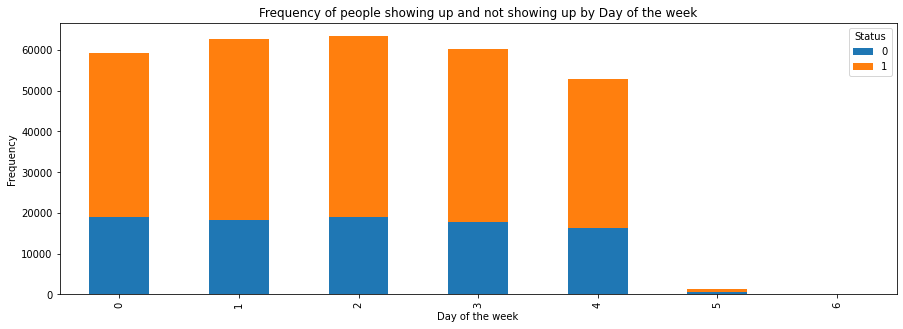

In [114]:
#Effect on Appointment Day of the Week on the Basis of Number of SMS Reminders
data_dow_status = data.groupby(['DayOfTheWeek', 'Status'])['DayOfTheWeek'].count().unstack('Status').fillna(0)
data_dow_status[[0, 1]].plot(kind='bar', stacked=True)
plt.title('Frequency of people showing up and not showing up by Day of the week')
plt.xlabel('Day of the week')
plt.ylabel('Frequency')

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


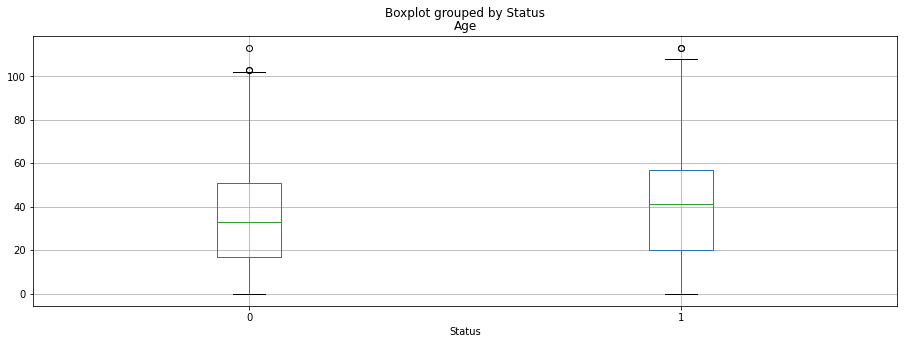

In [115]:
#Plotting Box Plot of Patients’ Age by Status
data.boxplot(column=['Age'], return_type='axes', by='Status')
plt.show()

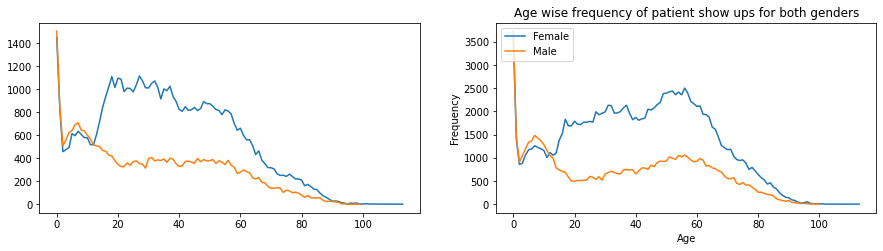

In [116]:
#Plotting Line Plot of Age by Gender for Patients Status-Wise
plt.figure(figsize=(15,3.5))
for i, status in enumerate(['no show ups', 'show ups']):
  data_show = data[data['Status']==i]
  plt.subplot(1, 2, i+1)
  for gender in [0, 1]:
    data_gender = data_show[data_show['Gender']==gender]
    freq_age = data_gender['Age'].value_counts().sort_index()
    freq_age.plot()
plt.title('Age wise frequency of patient %s for both genders'%status)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend(['Female', 'Male'], loc='upper left')

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


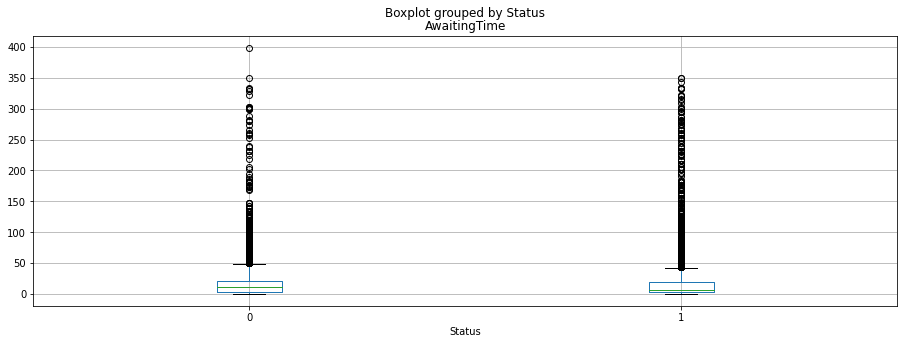

In [117]:
#Plotting Box Plot of AwaitingTime by Status
data.boxplot(column=['AwaitingTime'], return_type='axes', by='Status')
plt.show()

In [118]:
#Breaking Date Features into Date Components
for col in ['AppointmentRegistration', 'ApointmentData']:
  for index, component in enumerate(['year', 'month', 'day']):
    data['%s_%s'%(col, component)] = data[col].apply(lambda x:
                                                     int(x.split('T')[0].split('-')[index]))

In [119]:
#Breaking AppointmentRegistration into Time Components
for index, component in enumerate(['hour', 'min', 'sec']):
  data['%s_%s'%('AppointmentRegistration', component)] = data['AppointmentRegistration'].apply(lambda x: int(x.split('T')[1][:-1].split(':')[index]))

In [120]:
data.head()

,Age,Gender,AppointmentRegistration,ApointmentData,DayOfTheWeek,Status,Diabetes,Alcoolism,HiperTension,Smokes,Scholarship,Tuberculosis,Sms_Reminder,AwaitingTime,AppointmentRegistration_year,AppointmentRegistration_month,AppointmentRegistration_day,ApointmentData_year,ApointmentData_month,ApointmentData_day,AppointmentRegistration_hour,AppointmentRegistration_min,AppointmentRegistration_sec
0,19,1,2014-12-16T14:46:25Z,2015-01-14T00:00:00Z,2,1,0,0,0,0,0,0,0,29,2014,12,16,2015,1,14,14,46,25
1,24,0,2015-08-18T07:01:26Z,2015-08-19T00:00:00Z,2,1,0,0,0,0,0,0,0,1,2015,8,18,2015,8,19,7,1,26
2,4,0,2014-02-17T12:53:46Z,2014-02-18T00:00:00Z,1,1,0,0,0,0,0,0,0,1,2014,2,17,2014,2,18,12,53,46
3,5,1,2014-07-23T17:02:11Z,2014-08-07T00:00:00Z,3,1,0,0,0,0,0,0,1,15,2014,7,23,2014,8,7,17,2,11
4,38,1,2015-10-21T15:20:09Z,2015-10-27T00:00:00Z,1,1,0,0,0,0,0,0,1,6,2015,10,21,2015,10,27,15,20,9


In [121]:
#Declaring a Function to Detect Model’s Accuracy by Applying Methods Learned Previously
def model_performance(model_name, X_train, y_train, y_test, Y_pred):
  print ('Model name: %s'%model_name)
  print ('Test accuracy (Accuracy Score): %f'%metrics.accuracy_score(y_test, Y_pred))
  print ('Test accuracy (ROC AUC Score): %f'%metrics.roc_auc_score(y_test, Y_pred))
  print ('Train accuracy: %f'%clf.score(X_train, y_train))
  fpr, tpr, thresholds = metrics.precision_recall_curve(y_test, Y_pred)
  print ('Area Under the Precision-Recall Curve: %f'%metrics.auc(fpr, tpr))
  false_positive_rate, true_positive_rate, thresholds = metrics.roc_curve(y_test, Y_pred)
  roc_auc = metrics.auc(false_positive_rate, true_positive_rate)
  plt.title('Receiver Operating Characteristic')
  plt.plot(false_positive_rate, true_positive_rate, 'b',label='AUC = %0.2f'% roc_auc)
  plt.legend(loc='lower right')
  plt.plot([0,1],[0,1],'r--')
  plt.xlim([-0.1,1.2])
  plt.ylim([-0.1,1.2])
  plt.ylabel('True Positive Rate')
  plt.xlabel('False Positive Rate')
  plt.show()

**Cross Validation by Splitting the Dataset**

In [122]:
#Declaring Features for Model Training and Splitting Data into Training and Testing Sets
features_of_choice = [u'Age', u'Gender', 'DayOfTheWeek', 'Diabetes','Alcoolism', 'HiperTension',
                      'Smokes', 'Scholarship', 'Tuberculosis','Sms_Reminder','AwaitingTime', 'AppointmentRegistration_year',
                      'AppointmentRegistration_month','AppointmentRegistration_day', 'ApointmentData_year', 'ApointmentData_month',
                      'ApointmentData_day', 'AppointmentRegistration_hour', 'AppointmentRegistration_min','AppointmentRegistration_sec']
x = np.array(data[features_of_choice])
y = np.array(data['Status'])
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3,
random_state=1)

In [123]:
#Training the Model by Applying Decision Tree Classifier
clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

Model name: Decision tree classifier
Test accuracy (Accuracy Score): 0.590862
Test accuracy (ROC AUC Score): 0.524997
Train accuracy: 0.999952
Area Under the Precision-Recall Curve: 0.113326


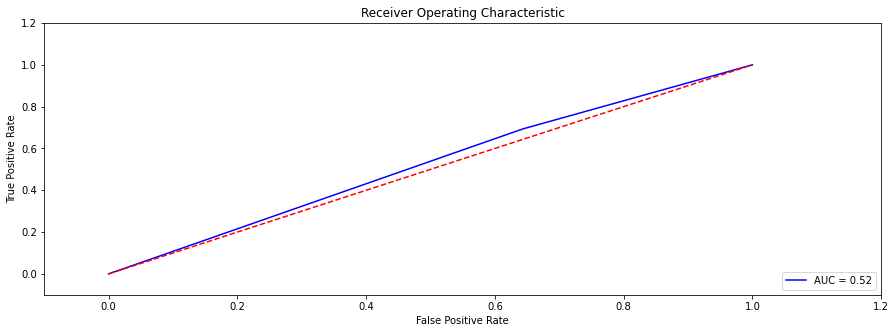

In [124]:
#Finding Accuracy of Decision Tree Classifier
y_pred = clf.predict(x_test)
model_performance('Decision tree classifier', x_train, y_train, y_test,
y_pred)

**Stochaistic Gradient Classifier (SGD)**

In [125]:
#Training the Model by Applying Kernel Approximation with SGD Classifier
rbf_feature = kernel_approximation.RBFSampler(gamma=1, random_state=1)
X_train = rbf_feature.fit_transform(x_train)
clf = SGDClassifier()
clf.fit(X_train, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

Model name: Kernel approximation
Test accuracy (Accuracy Score): 0.695619
Test accuracy (ROC AUC Score): 0.500000
Train accuracy: 0.698398
Area Under the Precision-Recall Curve: 0.152191


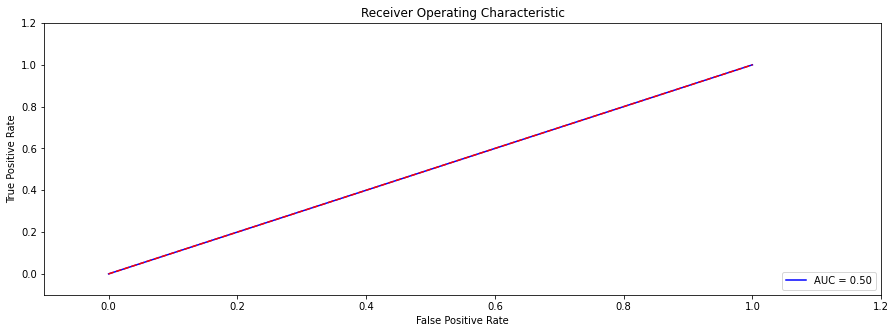

In [126]:
#Finding Accuracy of Kernel Approximation with SGD Classifier
X_test = rbf_feature.fit_transform(x_test)
Y_pred = clf.predict(X_test)
model_performance('Kernel approximation', X_train, y_train,y_test, Y_pred)

**Random Forest Classifier**

In [127]:
#Training RandomForest Classifier on Training Dataset
clf = RandomForestClassifier()
clf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

Model name: Random Forest
Test accuracy (Accuracy Score): 0.692430
Test accuracy (ROC AUC Score): 0.523762
Train accuracy: 0.999952
Area Under the Precision-Recall Curve: 0.150673


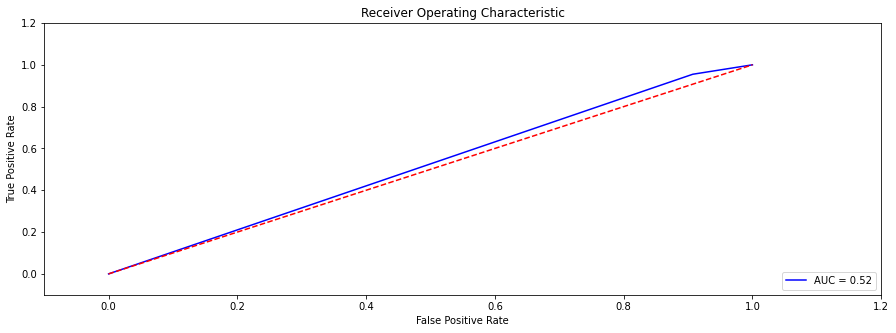

In [128]:
#Finding Accuracy of the Random Forest Classifier Model
y_pred = clf.predict(x_test)
model_performance('Random Forest', x_train, y_train, y_test, y_pred)

**Ensembler Method**

In [129]:
#Training the Model by Applying Gradient Boosting Classifier and Predicting Status Labels
clf = GradientBoostingClassifier(random_state=10, learning_rate=0.1,
n_estimators=200, max_depth=5, max_features=10)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

Model name: Gradient Boosting
Test accuracy (Accuracy Score): 0.700574
Test accuracy (ROC AUC Score): 0.515665
Train accuracy: 0.707488
Area Under the Precision-Recall Curve: 0.153798


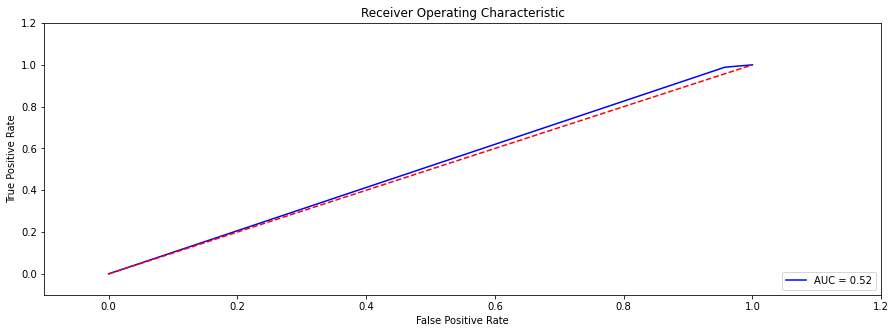

In [130]:
#Finding Accuracy of Gradient Boosting Classifier
model_performance('Gradient Boosting', x_train, y_train, y_test,y_pred)

In [131]:
#Printing Features’ Weight as Assigned by Gradient Boosting Classifier
for feature, score in zip(features_of_choice, list(clf.feature_importances_)):
  print('%s\t%f'%(feature, score))

Age	0.285965
Gender	0.006377
DayOfTheWeek	0.044006
Diabetes	0.003005
Alcoolism	0.014232
HiperTension	0.006846
Smokes	0.018557
Scholarship	0.013967
Tuberculosis	0.001170
Sms_Reminder	0.042766
AwaitingTime	0.198099
AppointmentRegistration_year	0.016188
AppointmentRegistration_month	0.027864
AppointmentRegistration_day	0.034320
ApointmentData_year	0.023834
ApointmentData_month	0.050441
ApointmentData_day	0.076729
AppointmentRegistration_hour	0.059561
AppointmentRegistration_min	0.040085
AppointmentRegistration_sec	0.035990


In [132]:
# for field in ['Gender', 'Status']:
#   data[field] = pd.Categorical.from_array(data[field]).codes
# data['Status'] = data['Status'].apply(lambda y: abs(y)
# diabetes_map={'Show-Up':0 , 'No-Show':1}
# data['Status']=data['Status'].map(diabetes_map)
# data.head()

In [133]:
#data['Awaiting time']=int(data['ScheduledDay'])-int(data['AppointmentDay'])
#data['Awaiting time']=int(data['ScheduledDay']).sub(int(data['AppointmentDay'],axis=0))

In [134]:
#df = pd.DataFrame(columns=["ScheduledDay", "AppointmentDay"])


# df.one = ["2019-01-24","2019-01-27"]
# df.one = pd.to_datetime(df.one)

# df.two = ["2019-01-28", "2020-01-29"]
# df.two = pd.to_datetime(df.two)

#df['AwaitingTime']=pd.to_datetime['ScheduledDay']-pd.to_datetime('AppointmentDay')